In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,glob, socket
import tifffile as tif
from skimage.filters import rank
from skimage.morphology import disk
import time,pickle
from funciones_wake import *
from scipy.ndimage import rotate





In [55]:

fsampling = 250
lista_cam = np.sort(glob.glob('/media/juan/JUAN_PMMH/LFD/photron/dshape*'))
lista_casos = [s for s in lista_cam if "_v0_" not in s]

lista_write =  np.sort(glob.glob('/home/juan/Documents/script_python/2024_flapflexwake/fastcam_coords/*.csv'))


dirw = '/home/juan/Documents/script_python/2024_flapflexwake/fastcam_stats/'
lista_objs = np.sort(glob.glob(dirw+'*.pickle'))




for i,filei in enumerate(lista_objs[42:46]):

        file_aux = open(filei, 'rb')
        data = pickle.load(file_aux)
        za1,za2,zb,zc,zd1,zd2 = data.complex_num_1
        za_m,zb_m,zc_m,zd_m = data.complex_num_0
        data.angulo_cuerpo1 = np.angle(zb-zc)
        #data.angulo_cuerpo1 = -np.pi/50+np.pi/2
        zrot = np.exp(1j*(np.pi/2-np.abs(data.angulo_cuerpo1)))
        angle = 90-np.abs(data.angulo_cuerpo1*90/np.pi*2)

        data_rot, (x1,y1) = rot(data.std, np.array([0,0]), angle)
        data.img2 = data_rot
        



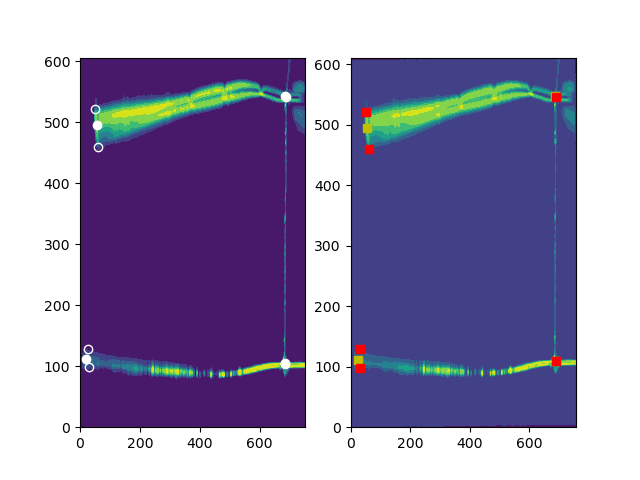

In [75]:
fig,ax = plt.subplots(1,2)
ax0,ax1 = ax
ax0.contourf(data.std)
xm = (np.array(data.std.shape)/2)
zm = xm[1]+1j*xm[0]
 
ax1.contourf(data.img2)

data.complex_num_0_rot = np.zeros_like(data.complex_num_0)
data.complex_num_1_rot = np.zeros_like(data.complex_num_1)


for i,xi in enumerate(data.complex_num_0):
    xi0,xi1 = [np.real(xi),np.imag(xi)]
    ax0.plot(xi0,xi1,'wo')
    xi2 = rot_point(data.std,np.array([xi0,xi1]),angle)
    ax1.plot(xi2[0],xi2[1],'ys')
    data.complex_num_0_rot[i]  = xi2[0] + xi2[1]*1j
for i,xi in enumerate(data.complex_num_1):
    xi0,xi1 = [np.real(xi),np.imag(xi)]
    ax0.plot(xi0,xi1,'wo',fillstyle='none')
    xi2 = rot_point(data.std,np.array([xi0,xi1]),angle)
    ax1.plot(xi2[0],xi2[1],'rs')   
    data.complex_num_1_rot[i]  = xi2[0] + xi2[1]*1j  
a,b,c,d = data.complex_num_0_rot
a1,a2,b_,c_,d1,d2 = data.complex_num_1_rot

delta_0 = np.imag(a)-np.imag(b)
delta_1 = np.imag(c)-np.imag(d)
delta_0_rms = np.abs(np.imag(a1)-np.imag(a2))
delta_1_rms = np.abs(np.imag(d1)-np.imag(d2))

In [77]:
delta_1_rms

61.86911039055997

In [66]:
a,b

((25.056722358268928+111.63623983151513j),
 (688.4843404247417+110.12231380238237j))

In [46]:
data.escala0

7.536597581036369e-05